In [5]:
import os
import re
os.chdir("/u/li19/MMMU")
from tqdm.auto import tqdm
import json
import matplotlib.pyplot as plt
import numpy as np

In [21]:
base      = {'Overall-Art and Design': {'num': 120, 'acc': 0.642}, 'Art': {'num': 30, 'acc': 0.633}, 'Art_Theory': {'num': 30, 'acc': 0.8}, 'Design': {'num': 30, 'acc': 0.833}, 'Music': {'num': 30, 'acc': 0.3}, 'Overall-Business': {'num': 150, 'acc': 0.447}, 'Accounting': {'num': 30, 'acc': 0.433}, 'Economics': {'num': 30, 'acc': 0.5}, 'Finance': {'num': 30, 'acc': 0.367}, 'Manage': {'num': 30, 'acc': 0.433}, 'Marketing': {'num': 30, 'acc': 0.5}, 'Overall-Science': {'num': 150, 'acc': 0.393}, 'Biology': {'num': 30, 'acc': 0.5}, 'Chemistry': {'num': 30, 'acc': 0.3}, 'Geography': {'num': 30, 'acc': 0.467}, 'Math': {'num': 30, 'acc': 0.4}, 'Physics': {'num': 30, 'acc': 0.3}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.46}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.6}, 'Clinical_Medicine': {'num': 30, 'acc': 0.6}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.3}, 'Pharmacy': {'num': 30, 'acc': 0.433}, 'Public_Health': {'num': 30, 'acc': 0.367}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.575}, 'History': {'num': 30, 'acc': 0.6}, 'Literature': {'num': 30, 'acc': 0.833}, 'Sociology': {'num': 30, 'acc': 0.467}, 'Psychology': {'num': 30, 'acc': 0.4}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.462}, 'Agriculture': {'num': 30, 'acc': 0.467}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.5}, 'Computer_Science': {'num': 30, 'acc': 0.433}, 'Electronics': {'num': 30, 'acc': 0.433}, 'Energy_and_Power': {'num': 30, 'acc': 0.567}, 'Materials': {'num': 30, 'acc': 0.433}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.4}, 'Overall': {'num': 900, 'acc': 0.487}}
img_noop  = {'Overall-Art and Design': {'num': 120, 'acc': 0.608}, 'Art': {'num': 30, 'acc': 0.6}, 'Art_Theory': {'num': 30, 'acc': 0.767}, 'Design': {'num': 30, 'acc': 0.8}, 'Music': {'num': 30, 'acc': 0.267}, 'Overall-Business': {'num': 150, 'acc': 0.427}, 'Accounting': {'num': 30, 'acc': 0.367}, 'Economics': {'num': 30, 'acc': 0.467}, 'Finance': {'num': 30, 'acc': 0.333}, 'Manage': {'num': 30, 'acc': 0.433}, 'Marketing': {'num': 30, 'acc': 0.533}, 'Overall-Science': {'num': 150, 'acc': 0.347}, 'Biology': {'num': 30, 'acc': 0.4}, 'Chemistry': {'num': 30, 'acc': 0.3}, 'Geography': {'num': 30, 'acc': 0.367}, 'Math': {'num': 30, 'acc': 0.4}, 'Physics': {'num': 30, 'acc': 0.267}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.493}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.567}, 'Clinical_Medicine': {'num': 30, 'acc': 0.633}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.367}, 'Pharmacy': {'num': 30, 'acc': 0.433}, 'Public_Health': {'num': 30, 'acc': 0.467}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.575}, 'History': {'num': 30, 'acc': 0.633}, 'Literature': {'num': 30, 'acc': 0.767}, 'Sociology': {'num': 30, 'acc': 0.467}, 'Psychology': {'num': 30, 'acc': 0.433}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.448}, 'Agriculture': {'num': 30, 'acc': 0.5}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.5}, 'Computer_Science': {'num': 30, 'acc': 0.4}, 'Electronics': {'num': 30, 'acc': 0.433}, 'Energy_and_Power': {'num': 30, 'acc': 0.433}, 'Materials': {'num': 30, 'acc': 0.467}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.4}, 'Overall': {'num': 900, 'acc': 0.473}}
text_noop = {'Overall-Art and Design': {'num': 120, 'acc': 0.55}, 'Art': {'num': 30, 'acc': 0.5}, 'Art_Theory': {'num': 30, 'acc': 0.633}, 'Design': {'num': 30, 'acc': 0.7}, 'Music': {'num': 30, 'acc': 0.367}, 'Overall-Business': {'num': 150, 'acc': 0.393}, 'Accounting': {'num': 30, 'acc': 0.4}, 'Economics': {'num': 30, 'acc': 0.533}, 'Finance': {'num': 30, 'acc': 0.3}, 'Manage': {'num': 30, 'acc': 0.2}, 'Marketing': {'num': 30, 'acc': 0.533}, 'Overall-Science': {'num': 150, 'acc': 0.327}, 'Biology': {'num': 30, 'acc': 0.367}, 'Chemistry': {'num': 30, 'acc': 0.267}, 'Geography': {'num': 30, 'acc': 0.3}, 'Math': {'num': 30, 'acc': 0.433}, 'Physics': {'num': 30, 'acc': 0.267}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.427}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.433}, 'Clinical_Medicine': {'num': 30, 'acc': 0.5}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.3}, 'Pharmacy': {'num': 30, 'acc': 0.433}, 'Public_Health': {'num': 30, 'acc': 0.467}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.533}, 'History': {'num': 30, 'acc': 0.567}, 'Literature': {'num': 30, 'acc': 0.733}, 'Sociology': {'num': 30, 'acc': 0.5}, 'Psychology': {'num': 30, 'acc': 0.333}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.419}, 'Agriculture': {'num': 30, 'acc': 0.4}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.467}, 'Computer_Science': {'num': 30, 'acc': 0.367}, 'Electronics': {'num': 30, 'acc': 0.367}, 'Energy_and_Power': {'num': 30, 'acc': 0.5}, 'Materials': {'num': 30, 'acc': 0.5}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.333}, 'Overall': {'num': 900, 'acc': 0.433}}
all_noop  = {'Overall-Art and Design': {'num': 120, 'acc': 0.558}, 'Art': {'num': 30, 'acc': 0.5}, 'Art_Theory': {'num': 30, 'acc': 0.633}, 'Design': {'num': 30, 'acc': 0.733}, 'Music': {'num': 30, 'acc': 0.367}, 'Overall-Business': {'num': 150, 'acc': 0.413}, 'Accounting': {'num': 30, 'acc': 0.467}, 'Economics': {'num': 30, 'acc': 0.5}, 'Finance': {'num': 30, 'acc': 0.333}, 'Manage': {'num': 30, 'acc': 0.233}, 'Marketing': {'num': 30, 'acc': 0.533}, 'Overall-Science': {'num': 150, 'acc': 0.32}, 'Biology': {'num': 30, 'acc': 0.367}, 'Chemistry': {'num': 30, 'acc': 0.233}, 'Geography': {'num': 30, 'acc': 0.367}, 'Math': {'num': 30, 'acc': 0.4}, 'Physics': {'num': 30, 'acc': 0.233}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.407}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.433}, 'Clinical_Medicine': {'num': 30, 'acc': 0.533}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.333}, 'Pharmacy': {'num': 30, 'acc': 0.333}, 'Public_Health': {'num': 30, 'acc': 0.4}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.542}, 'History': {'num': 30, 'acc': 0.567}, 'Literature': {'num': 30, 'acc': 0.767}, 'Sociology': {'num': 30, 'acc': 0.467}, 'Psychology': {'num': 30, 'acc': 0.367}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.452}, 'Agriculture': {'num': 30, 'acc': 0.4}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.533}, 'Computer_Science': {'num': 30, 'acc': 0.4}, 'Electronics': {'num': 30, 'acc': 0.433}, 'Energy_and_Power': {'num': 30, 'acc': 0.533}, 'Materials': {'num': 30, 'acc': 0.533}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.333}, 'Overall': {'num': 900, 'acc': 0.442}}

In [7]:
base      = {'Overall-Art and Design': {'num': 120, 'acc': 0.642}, 'Art': {'num': 30, 'acc': 0.633}, 'Art_Theory': {'num': 30, 'acc': 0.8}, 'Design': {'num': 30, 'acc': 0.833}, 'Music': {'num': 30, 'acc': 0.3}, 'Overall-Business': {'num': 150, 'acc': 0.447}, 'Accounting': {'num': 30, 'acc': 0.433}, 'Economics': {'num': 30, 'acc': 0.5}, 'Finance': {'num': 30, 'acc': 0.367}, 'Manage': {'num': 30, 'acc': 0.433}, 'Marketing': {'num': 30, 'acc': 0.5}, 'Overall-Science': {'num': 150, 'acc': 0.393}, 'Biology': {'num': 30, 'acc': 0.5}, 'Chemistry': {'num': 30, 'acc': 0.3}, 'Geography': {'num': 30, 'acc': 0.467}, 'Math': {'num': 30, 'acc': 0.4}, 'Physics': {'num': 30, 'acc': 0.3}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.46}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.6}, 'Clinical_Medicine': {'num': 30, 'acc': 0.6}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.3}, 'Pharmacy': {'num': 30, 'acc': 0.433}, 'Public_Health': {'num': 30, 'acc': 0.367}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.575}, 'History': {'num': 30, 'acc': 0.6}, 'Literature': {'num': 30, 'acc': 0.833}, 'Sociology': {'num': 30, 'acc': 0.467}, 'Psychology': {'num': 30, 'acc': 0.4}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.462}, 'Agriculture': {'num': 30, 'acc': 0.467}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.5}, 'Computer_Science': {'num': 30, 'acc': 0.433}, 'Electronics': {'num': 30, 'acc': 0.433}, 'Energy_and_Power': {'num': 30, 'acc': 0.567}, 'Materials': {'num': 30, 'acc': 0.433}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.4}, 'Overall': {'num': 900, 'acc': 0.487}}
img_noop  = {'Overall-Art and Design': {'num': 120, 'acc': 0.608}, 'Art': {'num': 30, 'acc': 0.6}, 'Art_Theory': {'num': 30, 'acc': 0.767}, 'Design': {'num': 30, 'acc': 0.8}, 'Music': {'num': 30, 'acc': 0.267}, 'Overall-Business': {'num': 150, 'acc': 0.427}, 'Accounting': {'num': 30, 'acc': 0.367}, 'Economics': {'num': 30, 'acc': 0.467}, 'Finance': {'num': 30, 'acc': 0.333}, 'Manage': {'num': 30, 'acc': 0.433}, 'Marketing': {'num': 30, 'acc': 0.533}, 'Overall-Science': {'num': 150, 'acc': 0.347}, 'Biology': {'num': 30, 'acc': 0.4}, 'Chemistry': {'num': 30, 'acc': 0.3}, 'Geography': {'num': 30, 'acc': 0.367}, 'Math': {'num': 30, 'acc': 0.4}, 'Physics': {'num': 30, 'acc': 0.267}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.493}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.567}, 'Clinical_Medicine': {'num': 30, 'acc': 0.633}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.367}, 'Pharmacy': {'num': 30, 'acc': 0.433}, 'Public_Health': {'num': 30, 'acc': 0.467}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.575}, 'History': {'num': 30, 'acc': 0.633}, 'Literature': {'num': 30, 'acc': 0.767}, 'Sociology': {'num': 30, 'acc': 0.467}, 'Psychology': {'num': 30, 'acc': 0.433}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.448}, 'Agriculture': {'num': 30, 'acc': 0.5}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.5}, 'Computer_Science': {'num': 30, 'acc': 0.4}, 'Electronics': {'num': 30, 'acc': 0.433}, 'Energy_and_Power': {'num': 30, 'acc': 0.433}, 'Materials': {'num': 30, 'acc': 0.467}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.4}, 'Overall': {'num': 900, 'acc': 0.473}}
text_noop = {'Overall-Art and Design': {'num': 120, 'acc': 0.55}, 'Art': {'num': 30, 'acc': 0.5}, 'Art_Theory': {'num': 30, 'acc': 0.633}, 'Design': {'num': 30, 'acc': 0.7}, 'Music': {'num': 30, 'acc': 0.367}, 'Overall-Business': {'num': 150, 'acc': 0.393}, 'Accounting': {'num': 30, 'acc': 0.4}, 'Economics': {'num': 30, 'acc': 0.533}, 'Finance': {'num': 30, 'acc': 0.3}, 'Manage': {'num': 30, 'acc': 0.2}, 'Marketing': {'num': 30, 'acc': 0.533}, 'Overall-Science': {'num': 150, 'acc': 0.327}, 'Biology': {'num': 30, 'acc': 0.367}, 'Chemistry': {'num': 30, 'acc': 0.267}, 'Geography': {'num': 30, 'acc': 0.3}, 'Math': {'num': 30, 'acc': 0.433}, 'Physics': {'num': 30, 'acc': 0.267}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.427}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.433}, 'Clinical_Medicine': {'num': 30, 'acc': 0.5}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.3}, 'Pharmacy': {'num': 30, 'acc': 0.433}, 'Public_Health': {'num': 30, 'acc': 0.467}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.533}, 'History': {'num': 30, 'acc': 0.567}, 'Literature': {'num': 30, 'acc': 0.733}, 'Sociology': {'num': 30, 'acc': 0.5}, 'Psychology': {'num': 30, 'acc': 0.333}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.419}, 'Agriculture': {'num': 30, 'acc': 0.4}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.467}, 'Computer_Science': {'num': 30, 'acc': 0.367}, 'Electronics': {'num': 30, 'acc': 0.367}, 'Energy_and_Power': {'num': 30, 'acc': 0.5}, 'Materials': {'num': 30, 'acc': 0.5}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.333}, 'Overall': {'num': 900, 'acc': 0.433}}
all_noop  = {'Overall-Art and Design': {'num': 120, 'acc': 0.625}, 'Art': {'num': 30, 'acc': 0.567}, 'Art_Theory': {'num': 30, 'acc': 0.833}, 'Design': {'num': 30, 'acc': 0.733}, 'Music': {'num': 30, 'acc': 0.367}, 'Overall-Business': {'num': 150, 'acc': 0.453}, 'Accounting': {'num': 30, 'acc': 0.4}, 'Economics': {'num': 30, 'acc': 0.5}, 'Finance': {'num': 30, 'acc': 0.367}, 'Manage': {'num': 30, 'acc': 0.433}, 'Marketing': {'num': 30, 'acc': 0.567}, 'Overall-Science': {'num': 150, 'acc': 0.38}, 'Biology': {'num': 30, 'acc': 0.5}, 'Chemistry': {'num': 30, 'acc': 0.3}, 'Geography': {'num': 30, 'acc': 0.4}, 'Math': {'num': 30, 'acc': 0.4}, 'Physics': {'num': 30, 'acc': 0.3}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.473}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.6}, 'Clinical_Medicine': {'num': 30, 'acc': 0.6}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.3}, 'Pharmacy': {'num': 30, 'acc': 0.433}, 'Public_Health': {'num': 30, 'acc': 0.433}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.533}, 'History': {'num': 30, 'acc': 0.6}, 'Literature': {'num': 30, 'acc': 0.667}, 'Sociology': {'num': 30, 'acc': 0.467}, 'Psychology': {'num': 30, 'acc': 0.4}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.438}, 'Agriculture': {'num': 30, 'acc': 0.467}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.467}, 'Computer_Science': {'num': 30, 'acc': 0.367}, 'Electronics': {'num': 30, 'acc': 0.467}, 'Energy_and_Power': {'num': 30, 'acc': 0.467}, 'Materials': {'num': 30, 'acc': 0.467}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.367}, 'Overall': {'num': 900, 'acc': 0.474}}
text_noop_warn = {'Overall-Art and Design': {'num': 120, 'acc': 0.625}, 'Art': {'num': 30, 'acc': 0.6}, 'Art_Theory': {'num': 30, 'acc': 0.833}, 'Design': {'num': 30, 'acc': 0.7}, 'Music': {'num': 30, 'acc': 0.367}, 'Overall-Business': {'num': 150, 'acc': 0.427}, 'Accounting': {'num': 30, 'acc': 0.467}, 'Economics': {'num': 30, 'acc': 0.533}, 'Finance': {'num': 30, 'acc': 0.3}, 'Manage': {'num': 30, 'acc': 0.367}, 'Marketing': {'num': 30, 'acc': 0.467}, 'Overall-Science': {'num': 150, 'acc': 0.353}, 'Biology': {'num': 30, 'acc': 0.5}, 'Chemistry': {'num': 30, 'acc': 0.333}, 'Geography': {'num': 30, 'acc': 0.333}, 'Math': {'num': 30, 'acc': 0.367}, 'Physics': {'num': 30, 'acc': 0.233}, 'Overall-Health and Medicine': {'num': 150, 'acc': 0.413}, 'Basic_Medical_Science': {'num': 30, 'acc': 0.467}, 'Clinical_Medicine': {'num': 30, 'acc': 0.533}, 'Diagnostics_and_Laboratory_Medicine': {'num': 30, 'acc': 0.2}, 'Pharmacy': {'num': 30, 'acc': 0.433}, 'Public_Health': {'num': 30, 'acc': 0.433}, 'Overall-Humanities and Social Science': {'num': 120, 'acc': 0.483}, 'History': {'num': 30, 'acc': 0.533}, 'Literature': {'num': 30, 'acc': 0.733}, 'Sociology': {'num': 30, 'acc': 0.333}, 'Psychology': {'num': 30, 'acc': 0.333}, 'Overall-Tech and Engineering': {'num': 210, 'acc': 0.457}, 'Agriculture': {'num': 30, 'acc': 0.467}, 'Architecture_and_Engineering': {'num': 30, 'acc': 0.433}, 'Computer_Science': {'num': 30, 'acc': 0.433}, 'Electronics': {'num': 30, 'acc': 0.367}, 'Energy_and_Power': {'num': 30, 'acc': 0.567}, 'Materials': {'num': 30, 'acc': 0.533}, 'Mechanical_Engineering': {'num': 30, 'acc': 0.4}, 'Overall': {'num': 900, 'acc': 0.453}}

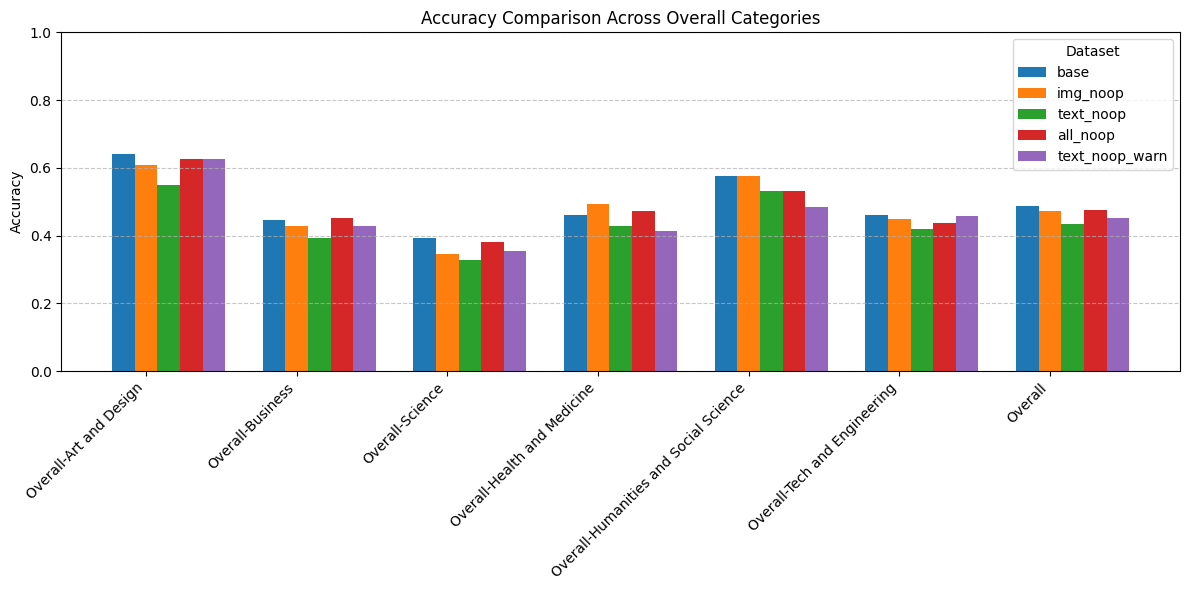

In [11]:

# Data for plotting
categories = ['base', 'img_noop', 'text_noop', "all_noop", "text_noop_warn"]
datasets = [base, img_noop, text_noop, all_noop, text_noop_warn]
overall_categories = [key for key in base.keys() if "overall" in key.lower()]
# overall_categories = [key for key in base.keys()]

# Prepare data
bar_width = 0.15
x_labels = overall_categories
x_positions = np.arange(len(x_labels))

# Accuracy Data
accuracy_data = {category: [data[key]['acc'] for key in x_labels] for category, data in zip(categories, datasets)}

# Plot bar charts
fig, ax = plt.subplots(figsize=(12, 6))
for i, (category, acc_values) in enumerate(accuracy_data.items()):
    ax.bar(x_positions + i * bar_width, acc_values, bar_width, label=category)

ax.set_ylim(0,1)
# Formatting
ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Across Overall Categories')
ax.legend(title="Dataset")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()